### **Segmentation Algorithm**

This algorithm is based on thresholding.


In [ ]:
import skimage
import skimage.util as util
import skimage.io as io
import numpy as np
import os as os
import glob
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_local,gaussian
from skimage.color import rgb2hsv
from skimage.color import hsv2rgb
import statistics
%matplotlib inline


def segleaf(I):
    '''
    Segment a leaf image.
    :param I: Color leaf image to segment.
    :return: Logical image where True pixels represent foreground (i.e. leaf pixels).
    '''
    hue_value = determine_value_intesity(I)
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(hue_value)

    t = 0.1
    mask = gray_image > t

    return mask

def determine_value_intesity(image):
    image_hsv = rgb2hsv(image)
    #blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)
    #lower and upper mask using hue value
    lower_mask = image_hsv[:,:,0] > 0.2
    upper_mask = image_hsv[:,:,0] < 0.38
    mask = upper_mask*lower_mask

    # masking the original image
    red = image[:,:,0]*mask
    green = image[:,:,1]*mask
    blue = image[:,:,2]*mask
    mask2 = np.dstack((red,green,blue))

    return mask2

### Implment Measures

Functions to compute the Dice Similarity Coefficient (DSC) measure of segmentation quality.  

In [ ]:
def dice_coef(ground_truth, segment):

    ground_truth = np.asarray(ground_truth).astype(np.bool)
    segment = np.asarray(segment).astype(np.bool)

    union = np.sum(ground_truth) + np.sum(segment)
    if union==0: return 1
    intersection = np.sum(ground_truth * segment)
    return 2. * intersection / union

## Validation driver program.

Code that segments each image, and computes the DSC for each segmentation.

In [ ]:
#### Validate ####
dice_mean = []
# Paths for folders -- original and ground truth images
images_path = os.path.join('.', 'images')
gt_path = os.path.join('.', 'groundtruth')


# Iterate over all files in the original images folder
for root, dirs, files in os.walk(images_path):
    for filename in files:
        # ignore files that are not PNG files.
        if filename[-4:] != '.png':
            continue
        fname = os.path.join(root, filename)
        segment= io.imread(fname)

        #hue_mask = determine_value_intesity(segment)

        segmented_image = segleaf(segment)
        #print(seg.shape)
        # concatenate variable root with filename to get the path to an input file.

        ground_truth_path = os.path.join('groundtruth/',"thresh"+filename)
        ground_truth =io.imread(ground_truth_path)
        #print(gt.shape)

        dice = dice_coef(ground_truth, segmented_image)
        dice_mean.append(dice)
        m = statistics.mean(dice_mean)
        print("DSC for: " + filename, dice)
    print("Mean: ", m)




DSC for: image_0001.png 0.9336666192311738
DSC for: image_0002.png 0.6941408145209623
DSC for: image_0005.png 0.8623048271988895
DSC for: image_0007.png 0.97010807606366
DSC for: image_0009.png 0.8099010310557722
DSC for: image_0010.png 0.9425892738807992
DSC for: image_0011.png 0.5237337543275177
DSC for: image_0015.png 0.9121698296562404
DSC for: image_0018.png 0.955370664672338
DSC for: image_0019.png 0.9637639520103084
DSC for: image_0078.png 0.957862256079768
DSC for: image_0080.png 0.8740843901067263
DSC for: image_0089.png 0.7395648670427075
DSC for: image_0090.png 0.4627178435747452
DSC for: image_0099.png 0.5972121195485591
DSC for: image_0100.png 0.7162384419439597
DSC for: image_0104.png 0.7573563517473103
DSC for: image_0105.png 0.629454776184793
DSC for: image_0110.png 0.7854121930490668
DSC for: image_0113.png 0.7978140778140778
DSC for: image_0132.png 0.6319170321124357
DSC for: image_0160.png 0.7040263655408513
DSC for: image_0161.png 0.82251250359876
DSC for: image_016

### Display Examples


DSC for image_0019: 0.9637639520103084


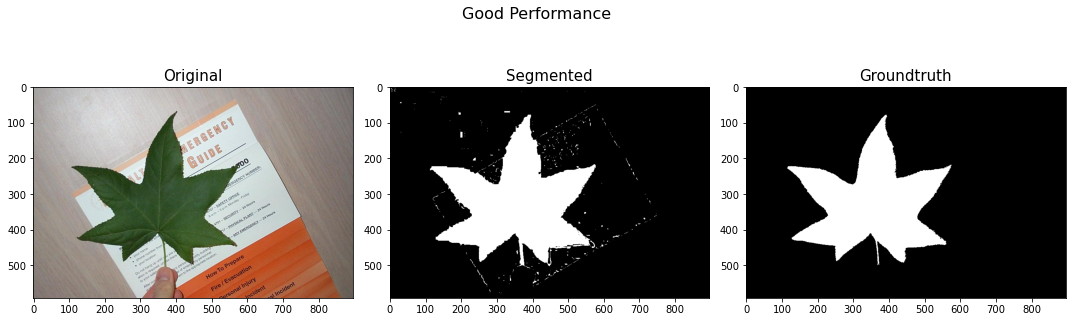

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

image1 = io.imread('images/image_0019.png')
segment_image1 = segleaf(image1)
truth_image1 = io.imread('groundtruth/threshimage_0019.png')
dice1 = dice_coef(truth_image1, segment_image1)

print("DSC for image_0019:", dice1)

fig, ax = plt.subplots(1,3,figsize=(15,5))
plt.suptitle('Good Performance', fontsize=16)

ax[0].imshow(image1)
ax[0].set_title('Original',fontsize=15)

ax[1].imshow(segment_image1, cmap='gray')
ax[1].set_title('Segmented',fontsize=15)

ax[2].imshow(truth_image1, cmap='gray')
ax[2].set_title('Groundtruth',fontsize=15)

plt.tight_layout()
plt.show()

DSC for image_0175: 0.4276619772227007


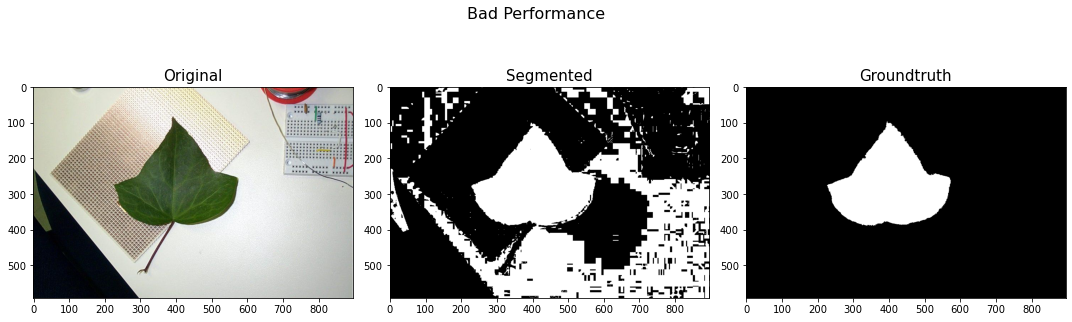

In [ ]:
image2 = io.imread('images/image_0175.png')
segment_image2 = segleaf(image2)
truth_image2 = io.imread('groundtruth/threshimage_0175.png')
dice2 = dice_coef(truth_image2, segment_image2)

print("DSC for image_0175:", dice2)

fig, ax = plt.subplots(1,3,figsize=(15,5))
plt.suptitle('Bad Performance', fontsize=16)

ax[0].imshow(image2)
ax[0].set_title('Original',fontsize=15)

ax[1].imshow(segment_image2, cmap='gray')
ax[1].set_title('Segmented',fontsize=15)

ax[2].imshow(truth_image2, cmap='gray')
ax[2].set_title('Groundtruth',fontsize=15)

plt.tight_layout()
plt.show()